## Lattice parameters for the Honney architecture.

Here we consider the transmon with 4 pins.  
The main idea is to created the generalize lattice parameters to pass the information to Qiskit Metal and have the physical implementation.

In [1]:
import numpy as np
from lattpy import Lattice
import lattpy as lp
import matplotlib.pyplot as plt
# Documentation https://lattpy.readthedocs.io/en/stable/

plt.rcParams["figure.figsize"] = [14, 8] # standard(7,4)

In [2]:
# Suppor function to create the lattice.
def general_lattice_creation(lattice_size : list = [10,6]):
    size = 6
    latt = lp.graphene(a=size)
    latt.build(lattice_size)
    return latt

In [3]:
# Support function that create the transmon lattice.
def transmon(size, latt, pos):
    if latt == 0:
        latt_pos = lp.Lattice.hexagonal()
        latt_pos.add_atom(pos=[0.0, 0.0])
        latt_pos.add_connections()  
        latt_pos.build([3,2], pos=[0,0])
    else:
        latt_aux = latt
        position_x = pos[0]
        position_y = pos[1]
        x = position_x-latt.shape[0]-1
        y = position_y

        latt_pos = lp.Lattice.hexagonal()
        latt_pos.add_atom(pos=[0.0, 0.0])
        latt_pos.add_connections() 
        if (pos[0]%size==0) == True:
            latt_pos.build([5,2], pos=[x,y])
        else:
            latt_pos.build([5,2], pos=[x,y])
        latt_aux.append(latt_pos, ax=0)
        latt_pos = latt_aux
    return latt_pos

In [224]:
# Support function to generate the data for the transmon.
def get_data(general_lattice, transmon_lattice):
    A_list = np.arange(1,500,5)
    B_list = np.arange(0,500,5)
    C_list = np.arange(4,500,5)
    D_list = np.arange(3,500,5)

    min_dist_matrix = []

    connectivity = general_lattice.neighbor_pairs(1)[0]

    for iter in connectivity: # latt
        q1 = iter[0]
        q2 = iter[1]

        q1_matrix = []
        q2_matrix = []

        for i in range(0,5): 
            q1_matrix.append(transmon_lattice.position(5*q1+i)) # latt_final
            q2_matrix.append(transmon_lattice.position(5*q2+i)) # latt_final

        min_dist = 500

        for i in range(len(q1_matrix)):
            for j in range(len(q2_matrix)):
                dist = lp.distance(q1_matrix[i],q2_matrix[j])
                if dist <= min_dist:
                    min_dist = dist
                    min = [5*q1+i, 5*q2+j]
        
        min_dist_matrix.append(min)

    min_dist_matrix
    pins = min_dist_matrix.copy()

    for i in range(len(min_dist_matrix)):
        for j in range(2):
            if min_dist_matrix[i][j] in A_list:
                pins[i][j] = 'A'
            elif min_dist_matrix[i][j] in B_list:
                pins[i][j] = 'B'
            elif min_dist_matrix[i][j] in C_list:
                pins[i][j] = 'C'
            elif min_dist_matrix[i][j] in D_list:
                pins[i][j] = 'D'

    points = general_lattice.num_sites
    coords = []

    for i in range(0, points):
        coords.append(general_lattice.position(i))

    return coords, connectivity, pins

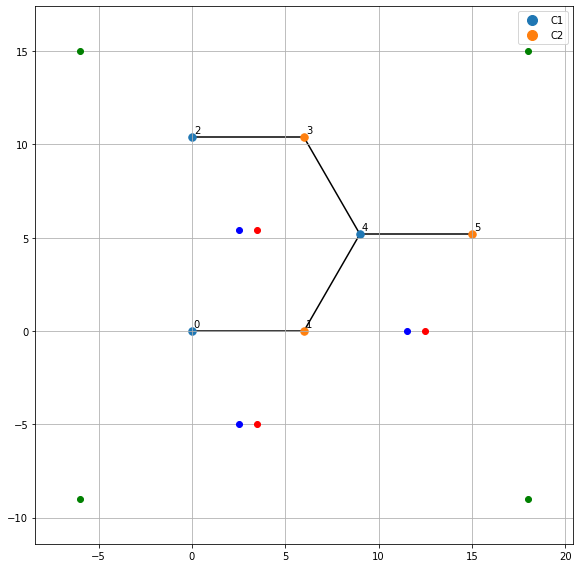

In [243]:
# Plot the information
size_x = 15
size_y = 12

lattice_size = [size_x, size_y] # [10,6]
general_lattice = general_lattice_creation(lattice_size)
general_lattice.plot(show_indices=True)

len_x = size_x
len_y = size_y-4

left_dots = []
right_dots = []

for j in range(0, len_y):

    for i in range(0,len_x):
        new_x = 3+i*18
        new_y = -5+10.4*j
        if new_x < len_x and new_y < len_y:
            #plt.plot(3+i*18, -5+10.4*j, "o", color='b') # Center
            plt.plot(3+i*18-0.5, -5+10.4*j, "o", color='b')
            plt.plot(3+i*18+0.5, -5+10.4*j, "o", color='r')
            left_dots.append([3+i*18-0.5, -5+10.4*j])
            right_dots.append([3+i*18+0.5, -5+10.4*j])

    for i in range(0,len_x):
        new_x = 12+i*18
        new_y = 10.4*j
        if new_x < len_x and new_y < len_y:
            #plt.plot(12+i*18, 10.4*j, "o", color='b') # Center
            plt.plot(12+i*18-0.5, 10.4*j, "o", color='b')
            plt.plot(12+i*18+0.5, 10.4*j, "o", color='r')
            left_dots.append([12+i*18-0.5, 10.4*j])
            right_dots.append([12+i*18+0.5, 10.4*j])

# Measure_Paths
plt.plot(-6, size_y+3, "o", color='g')
plt.plot(-6, -9, "o", color='g')

general_paths = [[-6, size_y+3],[-6, -9]]
np.save("general_paths",general_paths)

# Ground
plt.plot(size_x+3, -9, "o", color='g') 
plt.plot(size_x+3, size_y+3, "o", color='g')

ground = [[size_x+3, -9], [size_x+3, size_y+3]]
np.save("ground", ground)

plt.grid()
plt.show()

In [244]:
def define_path(coords, entire_matrix, parity):
    min = 100
    matrix = []
    for i in range(0, len(entire_matrix)):
        error = np.sqrt((coords[0]-entire_matrix[i][0])**2+(coords[1]-entire_matrix[i][1])**2)

        if parity == 0:
            if error <= min and entire_matrix[i][1]<=coords[1]+1 and entire_matrix[i][0]<=coords[0]+3 and entire_matrix[i][0]>=coords[0]-3:
                min = error
                matrix = entire_matrix[i]
        else:
            if error <= min and entire_matrix[i][1]<=coords[1]+1 and entire_matrix[i][0]<=coords[0]:
                min = error
                matrix = entire_matrix[i]

    return matrix

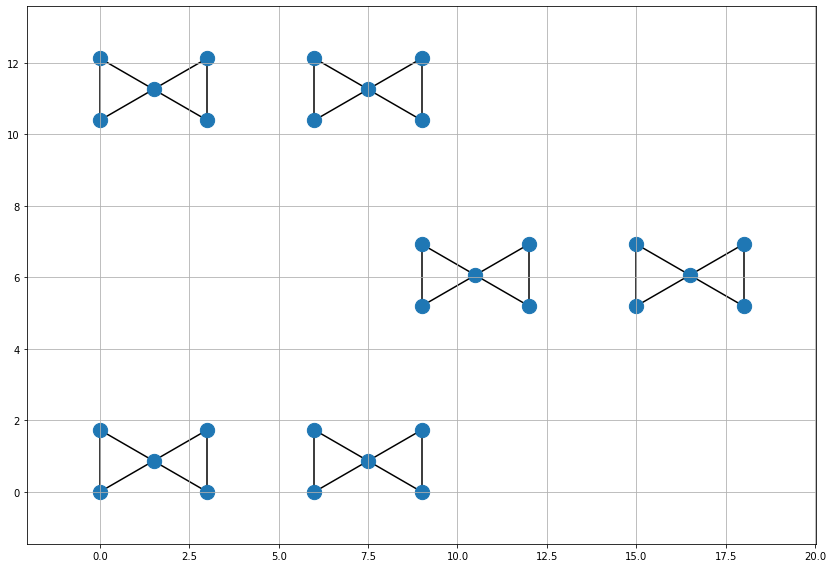

In [245]:
# Plot the lattice with the transmon implementations
size = 6 #8
transmon_lattice = transmon(size, 0, 0)

for i in range(general_lattice.num_sites):
    if i != 0:
        latt_final = transmon(size, transmon_lattice, general_lattice.position(i))

transmon_lattice.plot(show_indices=False)

plt.grid()
plt.show()


In [246]:
np.save("left_path", left_dots)
np.save("right_path", right_dots)

In [247]:
# Save the data for sending to Qiskit Metal.
coords, connectivity, pins = get_data(general_lattice, transmon_lattice)
paths = []

for i in range(0, len(left_dots+right_dots)):
    if i%2 == 0:
        paths.append(define_path(coords[i], left_dots+right_dots, 0))
    else:
        paths.append(define_path(coords[i], left_dots+right_dots, 1))

print("The coordinates for the general lattice are: \n {}".format(coords))
print("The connectivity between the qubits are: \n {}".format(connectivity))
print("The pins to be connected are: \n {}".format(pins))
print("Paths: \n {}".format(paths))

np.save("coords", coords)
np.save("connectivity", connectivity)
np.save("pins", pins)
np.save("paths", paths)

The coordinates for the general lattice are: 
 [array([0., 0.]), array([6., 0.]), array([ 0.        , 10.39230485]), array([ 6.        , 10.39230485]), array([9.        , 5.19615242]), array([15.        ,  5.19615242])]
The connectivity between the qubits are: 
 [[0 1]
 [1 4]
 [2 3]
 [3 4]
 [4 5]]
The pins to be connected are: 
 [['C', 'A'], ['C', 'B'], ['C', 'A'], ['D', 'A'], ['C', 'A']]
Paths: 
 [[2.5, -5.0], [3.5, -5.0], [2.5, 5.4], [3.5, 5.4], [11.5, 0.0], [12.5, 0.0]]
